In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [16]:
data_dir = '/content/drive/MyDrive/KLE_BCA_GOKAK/Prj2'
categories = os.listdir(data_dir)



In [17]:

images = []
labels = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    print(f"Processing category: {category}")

    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
            images.append(img)
            labels.append(category)

Processing category: Totato__healthy
Processing category: Potato__healthy
Processing category: Tomato __target__spot


In [18]:
# Convert to numpy arrays

X = np.array(images)

y = np.array(labels)

print("Labels:", np.unique(y))
print("Data shape:", X.shape)

Labels: ['Potato__healthy' 'Tomato __target__spot' 'Totato__healthy']
Data shape: (1138, 64, 64, 3)


Class Distribution:
Tomato __target__spot    540
Totato__healthy          446
Potato__healthy          152
Name: count, dtype: int64


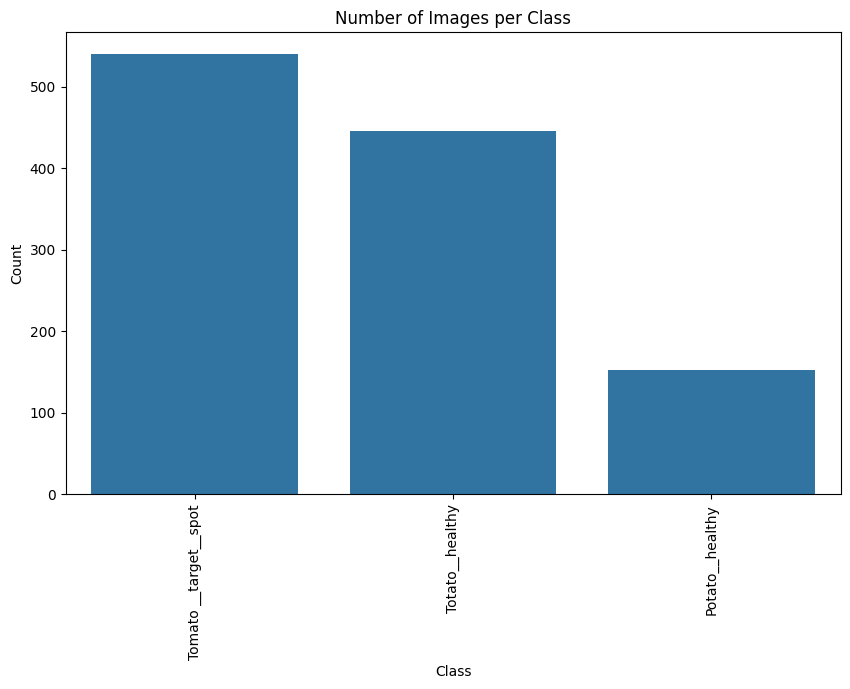

In [19]:
# Count class distribution
class_counts = pd.Series(labels).value_counts()
print("Class Distribution:")
print(class_counts)

# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [20]:
# Remove corrupted images (if any)
valid_images = []
valid_labels = []

for img, label in zip(X, y):  # Ensure all images are valid
    if img.shape == (64, 64, 3):
        valid_images.append(img)
        valid_labels.append(label)

X = np.array(valid_images)
y = np.array(valid_labels)

print("Cleaned Data Shape:", X.shape)

Cleaned Data Shape: (1138, 64, 64, 3)


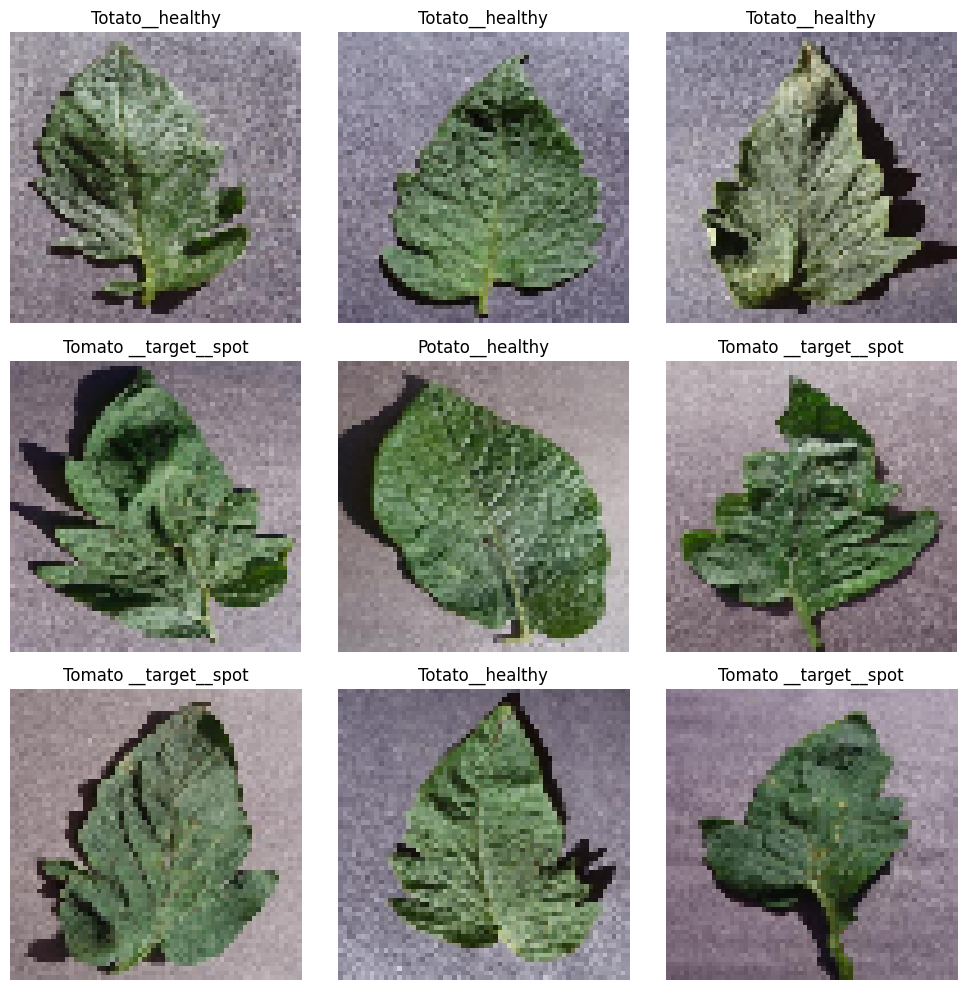

In [21]:
# Show sample images
import random
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(X) - 1)  # Corrected index range
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(y[idx])  # Use the original labels
    plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # Convert to HSV color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Extract features
hist_features = [extract_color_histogram(img) for img in X]
X_features = np.array(hist_features)

In [23]:
model = SVC(kernel='rbf', C=10, gamma='scale')

In [24]:



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

Accuracy: 0.9736842105263158
F1 Score: 0.9736268884797927


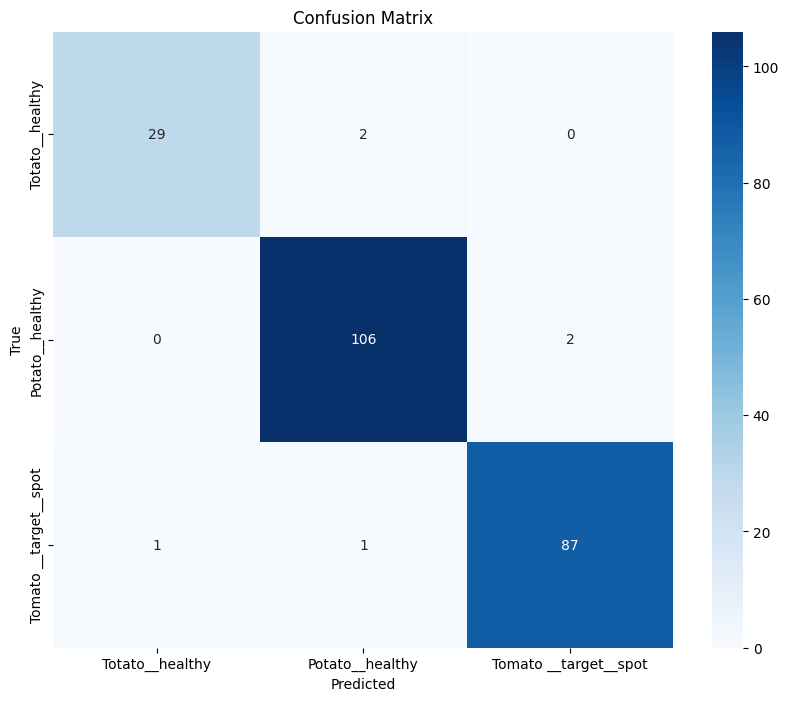

In [25]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
classification_report

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

Classification Report:
                       precision    recall  f1-score   support

      Totato__healthy       0.97      0.94      0.95        31
      Potato__healthy       0.97      0.98      0.98       108
Tomato __target__spot       0.98      0.98      0.98        89

             accuracy                           0.97       228
            macro avg       0.97      0.96      0.97       228
         weighted avg       0.97      0.97      0.97       228



In [27]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Encoded Labels:", np.unique(y_encoded))

Encoded Labels: [0 1 2]
